In [1]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from PIL import Image
from torchvision import transforms


import sys
sys.path.append("../")
from model import create_model
import utils

%load_ext autoreload
%autoreload 2

In [9]:
def plot(img, pred, threshold=0.5):
    plt.figure(figsize=(20,20));
    plt.subplot(131)
    plt.imshow(img)
    plt.title('Image')
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(pred.cpu().numpy()[0]>threshold)
    plt.title('Segmentation Output')
    plt.axis('off')

def pred(image, model):
    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    input_tensor = preprocess(image)
    input_batch = input_tensor.unsqueeze(0)
    
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')

    with torch.no_grad():
        output = model(input_batch)['out'][0]
        return output

In [3]:
model = create_model()
checkpoint = torch.load('../model.pth', map_location='cpu')
model.load_state_dict(checkpoint['model'])
_ = model.eval()

if torch.cuda.is_available():
    model.to('cuda')

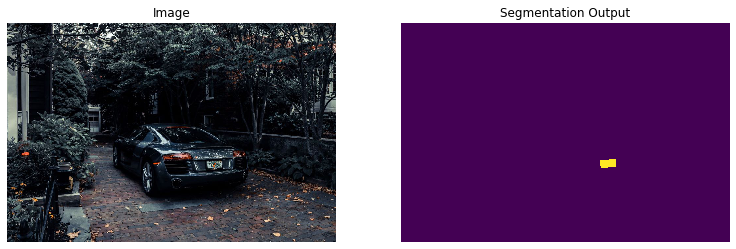

In [10]:
image = Image.open(f'./picture.jpg').convert('RGB')
outputs = pred(image=image, model=model)
plot(image, outputs, threshold=0.1)